### 2.8. Итоговое задание

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

Ниже вы найдете пошаговую инструкцию по выполнению проекта.

#### Описание датасета

Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)
19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

#### Рекомендации по выполнению проекта

    Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
    Посмотрите на распределение признака для числовых переменных, устраните выбросы.
    Оцените количество уникальных значений для номинативных переменных.
    По необходимости преобразуйте данные
    Проведите корреляционный анализ количественных переменных
    Отберите не коррелирующие переменные.
    Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
    Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.


In [295]:
stud_math = pd.read_csv('stud_math.csv')
stud_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [296]:
stud_math.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [297]:
stud_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


#### 3 вида столбцов: int, float, object. Итого 17 строковых и 13 числовых.

In [299]:
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [300]:
stud_math.school

0      GP
1      GP
2      GP
3      GP
4      GP
       ..
390    MS
391    MS
392    MS
393    MS
394    MS
Name: school, Length: 395, dtype: object

In [301]:
stud_math.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [304]:
stud_math.loc[:, ['school']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


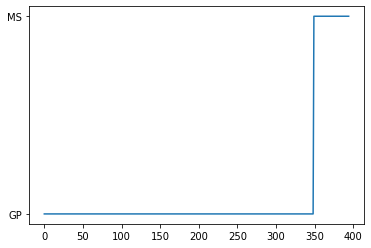

In [305]:
plt.plot(stud_math.school)

In [310]:
stud_math_obj_type = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob ', 'Fjob', 'reason',\
            'guardian', 'schoolsup ', 'famsup', 'paid', 'activities', 'nursery', 'higher ', \
           'internet', 'romantic']

In [311]:
stud_math_obj_type

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob ',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup ',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher ',
 'internet',
 'romantic']

In [341]:
stud_math_int_type = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',\
                     'studytime, granular', 'famrel', 'freetime', 'goout', 'health',\
                      'absences', 'score']

In [342]:
stud_math_int_type

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'studytime, granular',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'score']

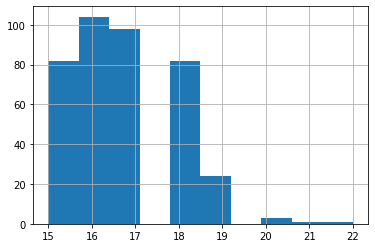

In [319]:
stud_math.age.hist()

In [350]:
def describe_int(column):
    stud_math.loc[:, [column]].describe()

In [334]:
def hist_intt(column):
    stud_math.loc[:, [column]].hist()

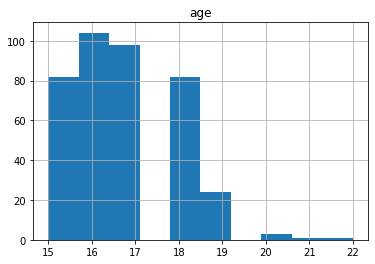

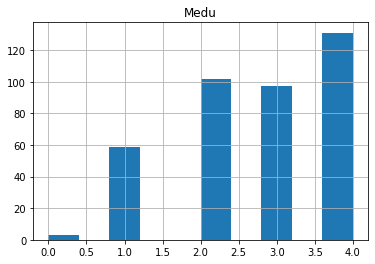

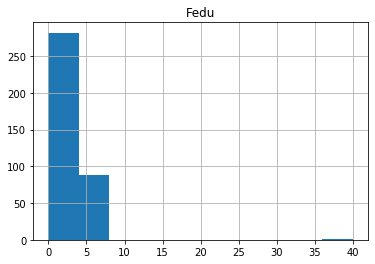

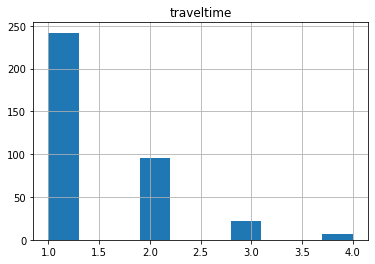

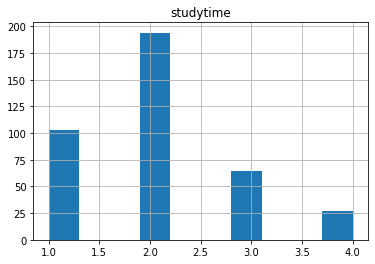

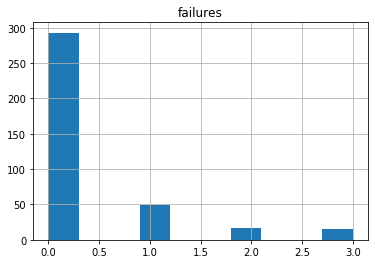

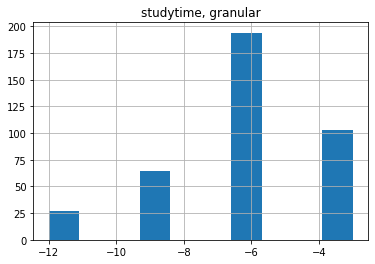

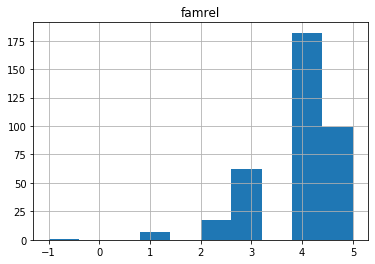

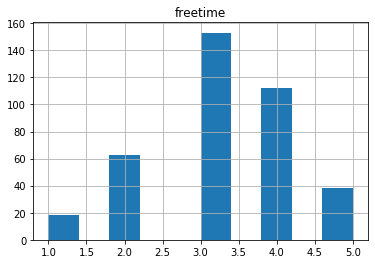

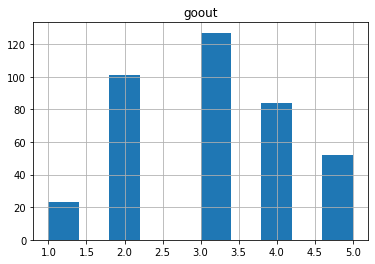

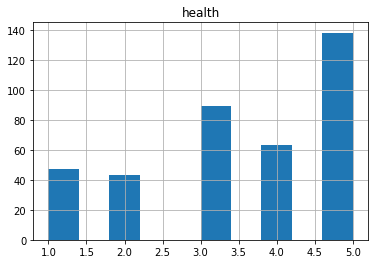

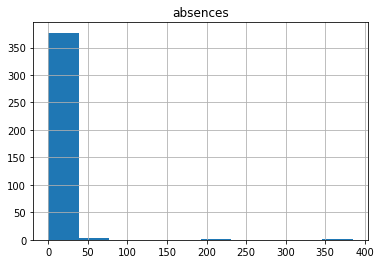

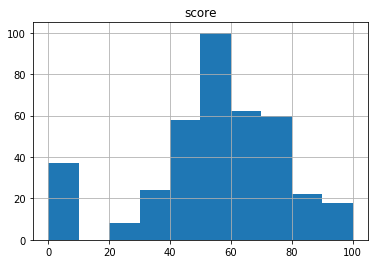

In [343]:
for col in stud_math_int_type:
    hist_intt(col)

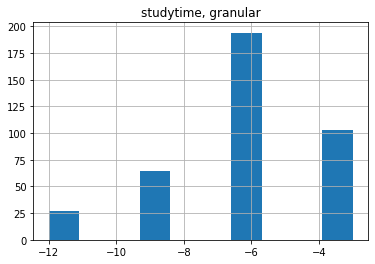

In [340]:
hist_intt('studytime, granular')

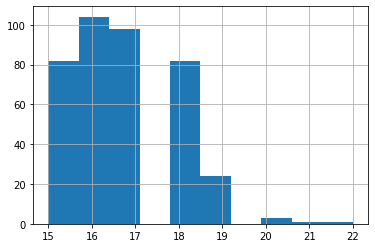

In [330]:
stud_math.age.hist()

In [358]:
for col in stud_math_int_type:
    display(describe_int(col))

None

None

None

None

None

None

None

None

None

None

None

None

None

In [356]:
describe_int('age')

,age
count,395.000000
mean,16.696203
std,1.276043
min,15.000000
25%,16.000000
50%,17.000000
75%,18.000000
max,22.000000


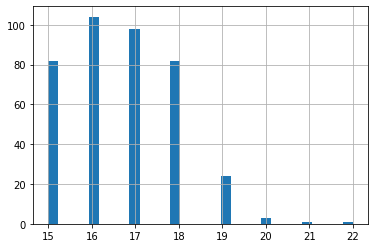

In [378]:
stud_math.age.hist(bins = 30)
stud_math.loc[:, ['age']].describe()

In [373]:
stud_math.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

В основном мы рассматриваем учеников возвраста 15 - 18 лет. Пропусков в данных нет, выброосов тоже.

In [379]:
stud_math.loc[:, ['age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [359]:
stud_math_int_type

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'studytime, granular',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'score']

,Medu
count,392.000000
mean,2.750000
std,1.098127
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


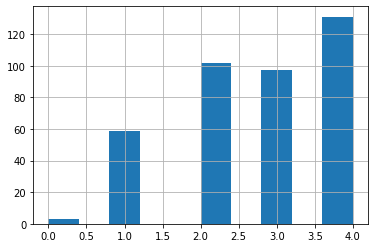

In [403]:
stud_math.Medu.hist(label = 'Medu')
stud_math.loc[:, ['Medu']].describe()
#plt.legend()

Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее).
Видим, что матери в целом с образованием.

In [384]:
stud_math.loc[:, ['Medu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Есть пропуски в данных. Заменим их на None.

In [390]:
stud_math.Medu = stud_math.Medu.apply(lambda x: None if pd.isnull(x) else x) 

In [392]:
stud_math.loc[:, ['Medu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


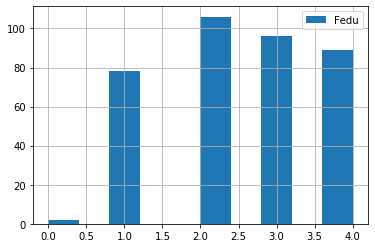

In [387]:
stud_math.Fedu.hist(bins = 10, label = 'Fedu')
stud_math.loc[:, ['Fedu']].describe()
plt.legend()

В данных по образованию у отцов есть выборосы. Очевидно, что кто-то промахнулся и занес 40 вместо 4. Заменим данные.

In [364]:
stud_math.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [367]:
stud_math[stud_math.Fedu == 40]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


In [369]:
stud_math.loc[11, ['Fedu']]

Fedu    40
Name: 11, dtype: object

In [370]:
stud_math.loc[11, ['Fedu']] = 4

In [371]:
stud_math.loc[11, ['Fedu']]

Fedu    4
Name: 11, dtype: object

In [372]:
stud_math.Fedu.value_counts()

2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: Fedu, dtype: int64

In [383]:
stud_math.loc[:, ['Fedu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Есть пропуски в данных (24 шт). Но заменять их не на что. Заменим пропуск на None.

In [393]:
stud_math.Fedu = stud_math.Fedu.apply(lambda x: None if pd.isnull(x) else x)

In [394]:
stud_math.loc[:, ['Fedu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


#### 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [396]:
stud_math.loc[:, ['traveltime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Есть пропуски в данных.

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

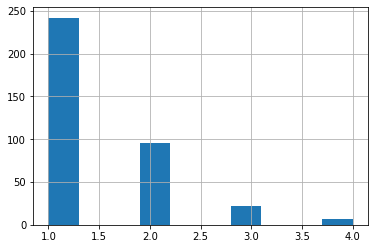

In [402]:
stud_math.traveltime.hist(label = 'traveltime')
stud_math.traveltime.describe()
#plt.legend()


In [398]:
stud_math.traveltime.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

#### 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)



count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

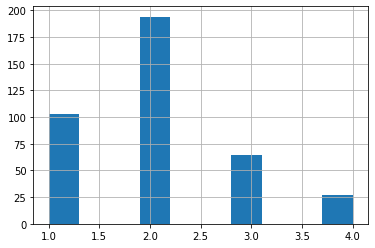

In [406]:
stud_math.studytime.hist()
stud_math.studytime.describe()

In [408]:
stud_math.studytime.value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

Удивительно, но абсолютно все тратят время на учебу вне школы, и в основном от 2 до 5 часов.

#### 15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

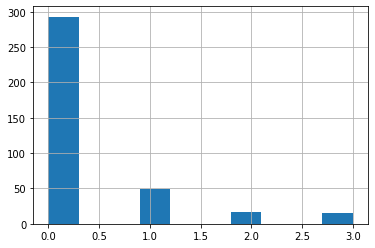

In [409]:
stud_math.failures.hist()
stud_math.failures.describe()

In [411]:
stud_math.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

Выбросов нет. Пустые значения есть. Проблем у учеников особо нет. Скорее всего этот параметр никак не сказывается на успеваемости.

#### studytime, granular - что это?

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

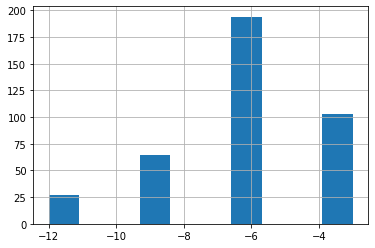

In [412]:
stud_math['studytime, granular'].hist()
stud_math['studytime, granular'].describe()

In [413]:
stud_math['studytime, granular'].value_counts()

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

Непонятно, для чего этот столбец, если он такой же, как studytime. Если он нормализован, то относительно чего? В данных нужно оставить только 1 из 2-ух столбцов. Оставляю studytime.

In [415]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.163670,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.625516,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.163670,0.625516,1.000000,-0.145349,0.012896,-0.272882,-0.012896,-0.022486,-0.025892,0.042663,0.023862,0.022572,0.130923
traveltime,0.081508,-0.173515,-0.145349,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.012896,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.272882,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.012896,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,-0.022486,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.025892,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,0.042663,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


Как видно из графика, а также из корреляционной таблицы, значения одинаковые, просто по разному описана корреляция: положительня и отрицательня.

#### 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)



count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

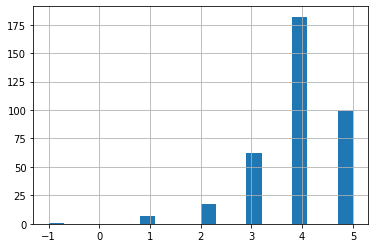

In [418]:
stud_math.famrel.hist(bins = 20)
stud_math.famrel.describe()

Очевидно есть выброс.

In [420]:
stud_math.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [421]:
stud_math[stud_math['famrel']==-1]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


Т.к. других проблем с этой записью нет, можно предположить, что - попал случайно. Поэтому заменим -1 на 1.

In [423]:
stud_math.loc[25, 'famrel'] =  1

In [424]:
stud_math.famrel.value_counts()

4.0    182
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

Из графика видно, что у признака нормальное распределение. В основном, с отношенииями в семьях все в порядке.

#### 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)



count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

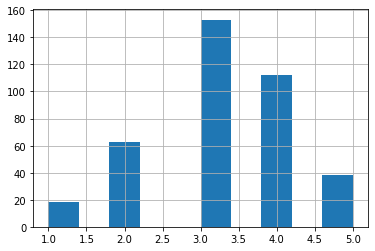

In [425]:
stud_math.freetime.hist()
stud_math.freetime.describe()

In [426]:
stud_math.freetime.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

Признак распределен нормально. Выбросов нет. Пропуски в данных есть. С учетом того, что большинстов учеников еще учатся дополнительно от 2 до 5 часов, у них отсается достаточно свободного времени.

#### 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)



count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

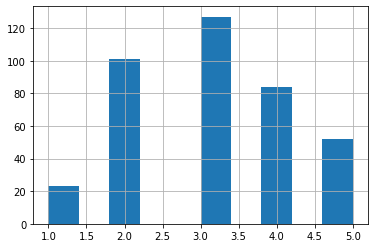

In [427]:
stud_math.goout.hist()
stud_math.goout.describe()

In [429]:
stud_math.goout.value_counts()

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

Признак также нормально распределен и не имеет выбрсов. Ребята скорее больше общительные, чем уединенные натуры.

#### 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)



count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

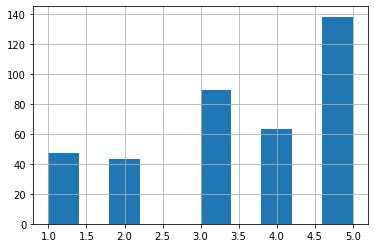

In [430]:
stud_math.health.hist()
stud_math.health.describe()

In [431]:
stud_math.health.value_counts()

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

Медиана = 4, и 1-ый и 3-ий процентили говорят о том, что 50% показателей здоровья лежат от 3 - 5. БОльшая часть ребят не имеет проблем со здоровьем. Что логично, т.к. в нашей выборке больше всего возрастов 15 - 18 лет.

#### 28 absences — количество пропущенных занятий



count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

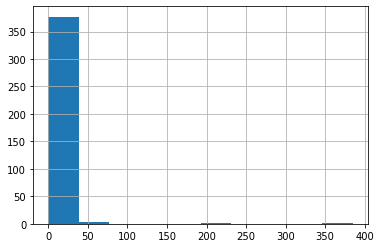

In [433]:
stud_math.absences.hist()
stud_math.absences.describe()

In [434]:
stud_math.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

Слишком большой разброс значений. Сузим его.

In [441]:
(stud_math.absences.value_counts()>10).sum() 

8

Всего 8 значений встречаются больше 10 раз.

25-ый перцентиль: 0.0 75-ый перцентиль: 8.0 IQR: 8.0 Границы выбросов: [-12.0, 20.0]


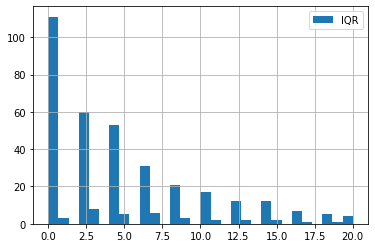

In [445]:
median = stud_math.absences.median()
IQR = stud_math.absences.quantile(.75) - stud_math.absences.quantile(.25)
perc25 = stud_math.absences.quantile(.25)
perc75 = stud_math.absences.quantile(.75)
print('25-ый перцентиль: {}'.format(perc25), '75-ый перцентиль: {}'.format(perc75),\
     'IQR: {}'.format(IQR), 'Границы выбросов: [{F}, {I}]'.format(F=perc25 - 1.5*IQR,\
                                                                 I = perc75 + 1.5*IQR),
     )

stud_math.absences.loc[stud_math.absences.between(perc25-1.5*IQR,perc75+1.5*IQR)].\
hist(bins = 30, label = 'IQR')

#stud_math.absences.hist(alpha = 0.5, bins = 15, label = 'All')

plt.legend()


Левая граница не показательна в данном случае, т.к. кол-во пропусков не может быть отрицательным.
Оставим значения, которые входят в промежуток [0, 20].

In [447]:
stud_math = stud_math.loc[stud_math.absences.between(0,perc75+1.5*IQR)]
stud_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


#### 29 score — баллы по госэкзамену по математике

count    361.000000
mean      51.994460
std       22.956117
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

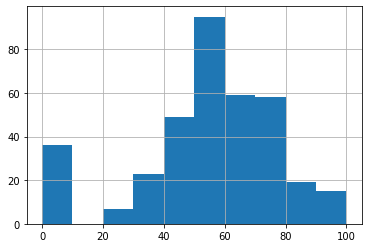

In [448]:
stud_math.score.hist()
stud_math.score.describe()

In [449]:
stud_math.score.value_counts()

50.0     53
55.0     42
0.0      36
75.0     31
65.0     30
60.0     29
70.0     27
40.0     26
45.0     23
80.0     16
30.0     14
35.0      9
90.0      9
25.0      7
95.0      5
85.0      3
100.0     1
Name: score, dtype: int64

Есть пропуски в данных, а в целом признак распределен нормально.
Т.к. данных у нас не так много (выкидывать их не хочется). Заполним пропуски средним значением (оно еще и ярко выраженное).

In [512]:
stud_math.score.mean()

51.99445983379501

In [519]:
#stud_math[stud_math.score == 0]
stud_math.score.fillna(value = stud_math.score.mean(), inplace = True)

In [520]:
stud_math.score.value_counts()

50.00000     53
55.00000     42
0.00000      36
75.00000     31
65.00000     30
60.00000     29
70.00000     27
40.00000     26
45.00000     23
80.00000     16
30.00000     14
90.00000      9
35.00000      9
25.00000      7
95.00000      5
51.99446      5
85.00000      3
100.00000     1
Name: score, dtype: int64

In [468]:
pd.isnull(stud_math).sum()

school                  0
sex                     0
age                     0
address                15
famsize                22
Pstatus                38
Medu                    3
Fedu                   23
Mjob                   16
Fjob                   34
reason                 17
guardian               30
traveltime             28
studytime               5
failures               19
schoolsup               9
famsup                 35
paid                   38
activities             14
nursery                16
studytime, granular     5
higher                 18
internet               32
romantic               30
famrel                 26
freetime                9
goout                   8
health                 15
absences                0
score                   5
dtype: int64

In [466]:
stud_math.loc[:, ['score']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   361 non-null    float64
dtypes: float64(1)
memory usage: 15.7 KB


In [ ]:
for col in stud_math_int_type:
    col.apply(about.col)

#### Корреляционный анализ

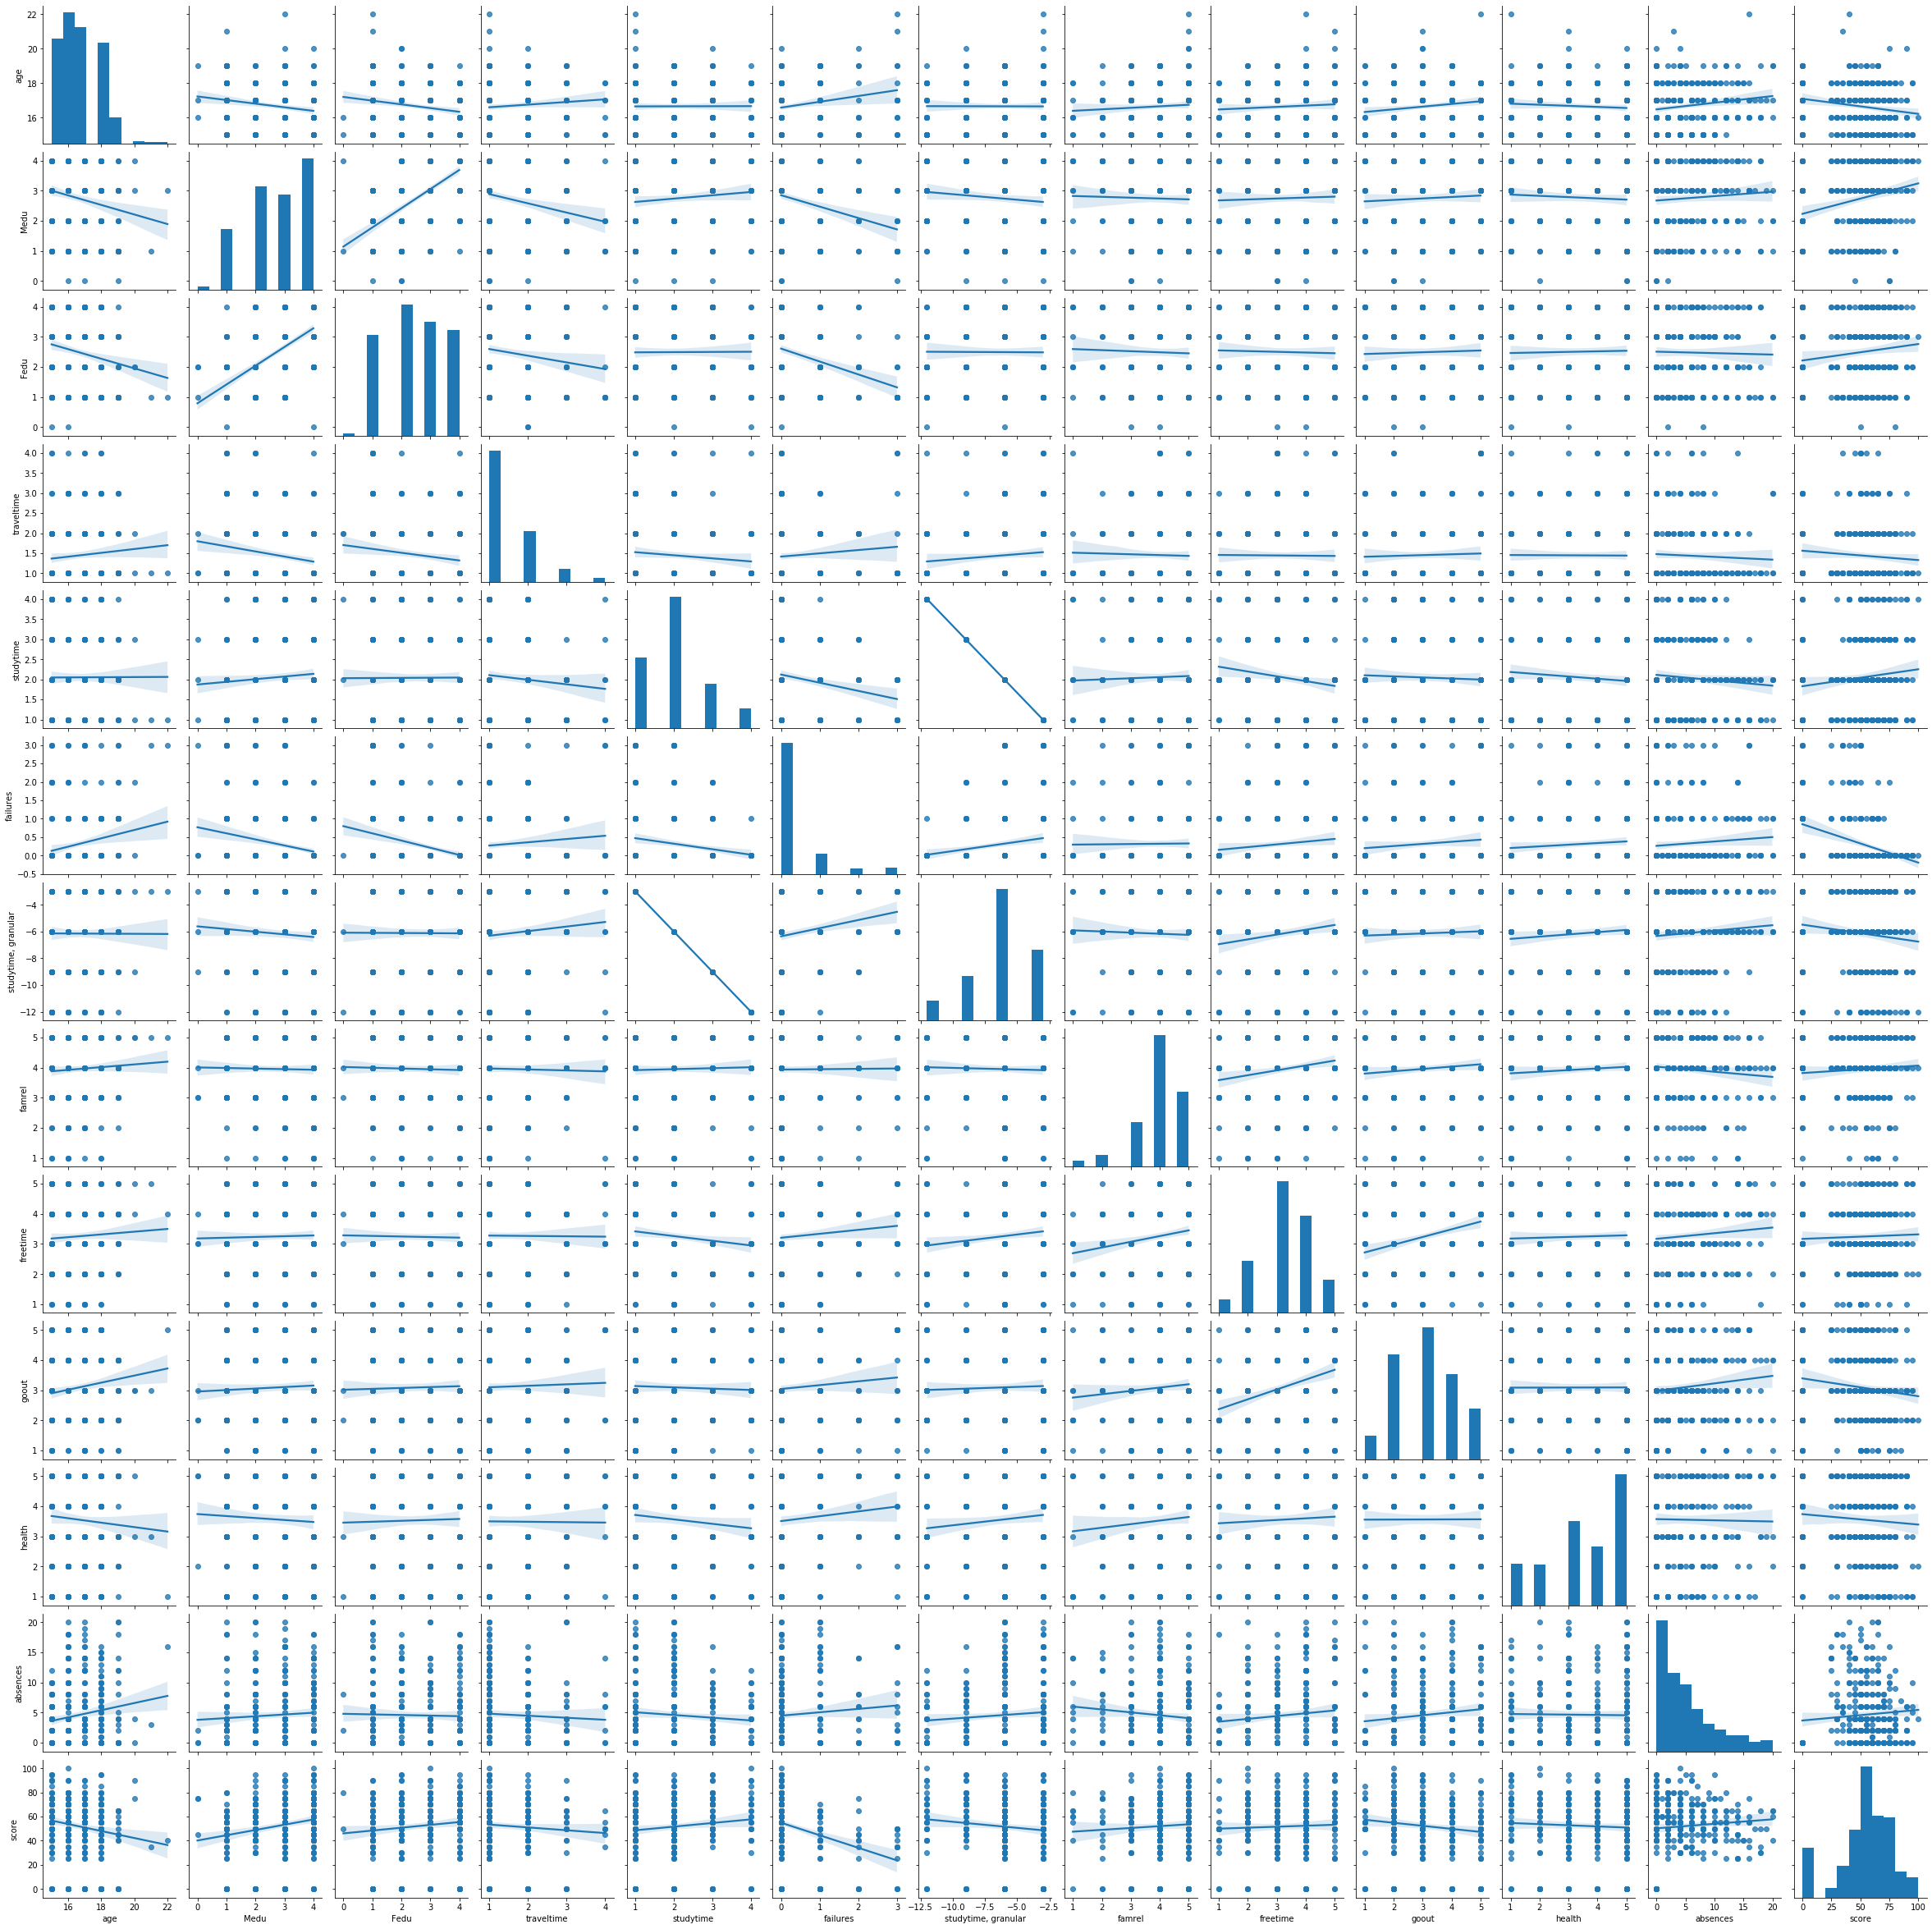

In [460]:
sns.pairplot(stud_math, kind = 'reg')

In [461]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.182463,-0.185368,0.085659,0.003035,0.195400,-0.003035,0.063204,0.058193,0.135466,-0.067958,0.151493,-0.159306
Medu,-0.182463,1.000000,0.629212,-0.197009,0.085532,-0.249754,-0.085532,-0.023323,0.027861,0.049094,-0.052316,0.065712,0.210257
Fedu,-0.185368,0.629212,1.000000,-0.145846,0.005116,-0.289421,-0.005116,-0.029874,-0.021205,0.029427,0.023932,-0.021811,0.113379
traveltime,0.085659,-0.197009,-0.145846,1.000000,-0.093825,0.085026,0.093825,-0.025343,-0.008602,0.031481,-0.006809,-0.047995,-0.074045
studytime,0.003035,0.085532,0.005116,-0.093825,1.000000,-0.174802,-1.000000,0.029926,-0.136510,-0.034197,-0.090552,-0.078099,0.113113
failures,0.195400,-0.249754,-0.289421,0.085026,-0.174802,1.000000,0.174802,0.009730,0.098642,0.085448,0.084991,0.081801,-0.329542
"studytime, granular",-0.003035,-0.085532,-0.005116,0.093825,-1.000000,0.174802,1.000000,-0.029926,0.136510,0.034197,0.090552,0.078099,-0.113113
famrel,0.063204,-0.023323,-0.029874,-0.025343,0.029926,0.009730,-0.029926,1.000000,0.175624,0.092537,0.080079,-0.090500,0.061516
freetime,0.058193,0.027861,-0.021205,-0.008602,-0.136510,0.098642,0.136510,0.175624,1.000000,0.289474,0.038437,0.093436,0.034952
goout,0.135466,0.049094,0.029427,0.031481,-0.034197,0.085448,0.034197,0.092537,0.289474,1.000000,0.002320,0.111587,-0.122246


Самая сильная корреляция успеваемости с образованием матери и обратная зависимость от количество неудач.

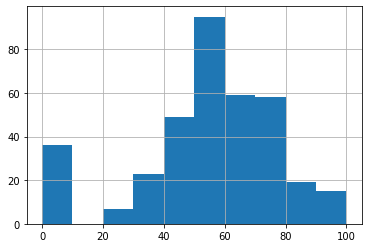

In [462]:
stud_math.score.hist()

In [515]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],

                   [3, 4, np.nan, 1],

                   [np.nan, np.nan, np.nan, 5],

                   [np.nan, 3, np.nan, 4]],

                  columns=list('ABCD'))

df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [479]:
df.A.mean()


3.0

In [483]:
df.fillna(value = 'A')

,A,B,C,D
0,A,2,A,0
1,3,4,A,1
2,A,A,A,5
3,A,3,A,4


In [517]:
df.A.fillna(df.A.mean(), inplace = True)

In [518]:
df

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,NaN,NaN,5
3,3.0,3.0,NaN,4


In [ ]:
category = []

#### Sex

count     366
unique      2
top         F
freq      191
Name: sex, dtype: object

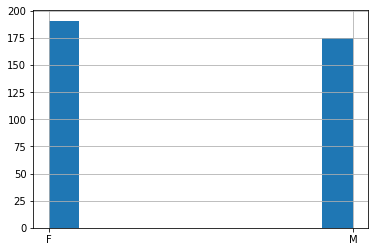

In [521]:
stud_math.sex.hist()
stud_math.sex.describe()

In [522]:
stud_math.sex.value_counts()

F    191
M    175
Name: sex, dtype: int64

Девочек больше чем мальчиков.

count     351
unique      2
top         U
freq      273
Name: address, dtype: object

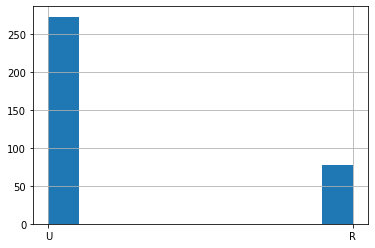

In [523]:
stud_math.address.hist()
stud_math.address.describe()

In [524]:
stud_math.address.value_counts()

U    273
R     78
Name: address, dtype: int64

Живущих в городе примерно в 3 раза больше. 

count     344
unique      2
top       GT3
freq      245
Name: famsize, dtype: object

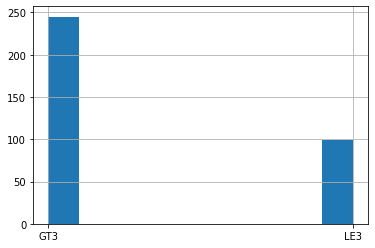

In [525]:
stud_math.famsize.hist()
stud_math.famsize.describe()


In [526]:
stud_math.famsize.value_counts()

GT3    245
LE3     99
Name: famsize, dtype: int64

Семьи из 3-ех человек в 2,5 раза встречаются чаще.

In [532]:
col = ['famsize', 'Pstatus']

for i in col:
    #stud_math[i].hist()
    #display(stud_math[i].describe())
    stud_math.loc[:, [i]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  344 non-null    object
dtypes: object(1)
memory usage: 15.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  328 non-null    object
dtypes: object(1)
memory usage: 15.7+ KB


count     328
unique      2
top         T
freq      296
Name: Pstatus, dtype: object

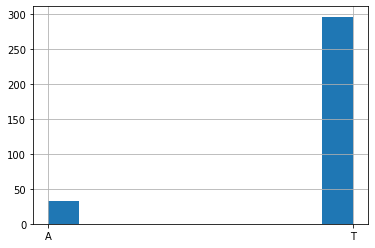

In [533]:
stud_math.Pstatus.hist()
stud_math.Pstatus.describe()

In [534]:
stud_math.Pstatus.value_counts()

T    296
A     32
Name: Pstatus, dtype: int64

10% родителей живут раздельно. 

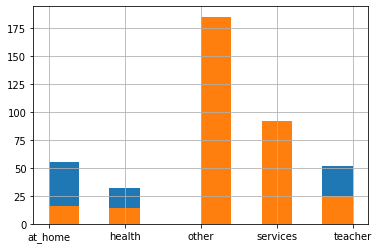

In [538]:
col = ['Mjob', 'Fjob']

for i in col:
    stud_math[i].hist()
    #stud_math.Mjob.describe()

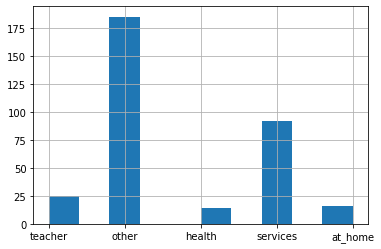

In [539]:
stud_math['Fjob'].hist()

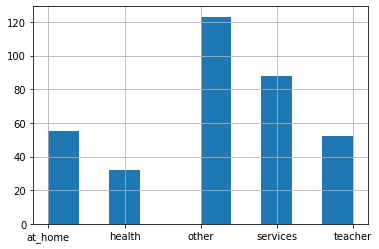

In [540]:
stud_math['Mjob'].hist()

In [541]:
stud_math.Mjob.value_counts()

other       123
services     88
at_home      55
teacher      52
health       32
Name: Mjob, dtype: int64

count        349
unique         4
top       course
freq         129
Name: reason, dtype: object

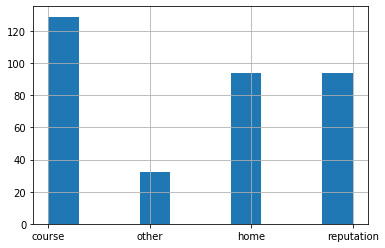

In [542]:
stud_math.reason.hist()
stud_math.reason.describe()

Большинство выбирает школу по программе.

count        336
unique         3
top       mother
freq         229
Name: guardian, dtype: object

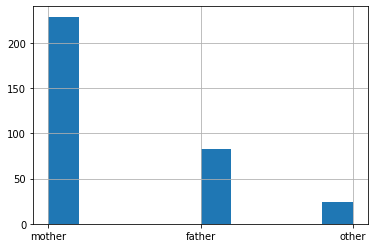

In [544]:
stud_math.guardian.hist()
stud_math.guardian.describe()

Ничего примечательного.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  357 non-null    object
dtypes: object(1)
memory usage: 15.7+ KB


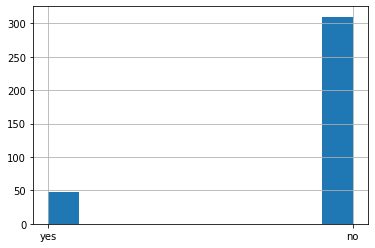

In [548]:
stud_math.schoolsup.hist()
stud_math.schoolsup.value_counts()
stud_math.loc[:, ['schoolsup']].info()

Не так много пропусков в данных. Доп.образовательная поддержка - только у 7%, кол-во свободного времени = 1 час у 5%. Здесь все бьется. 

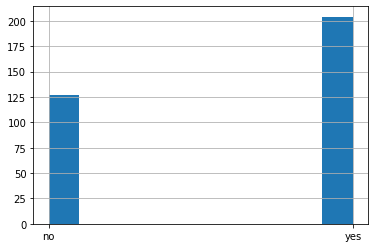

In [549]:
stud_math.famsup.hist()

В основном детей поддерживают.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    328 non-null    object
dtypes: object(1)
memory usage: 15.7+ KB


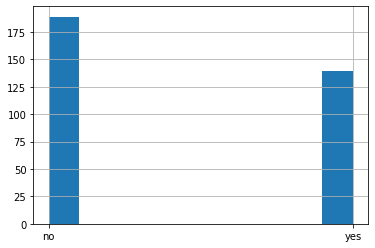

In [553]:
stud_math.paid.hist()
stud_math.loc[:, ['paid']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  352 non-null    object
dtypes: object(1)
memory usage: 15.7+ KB


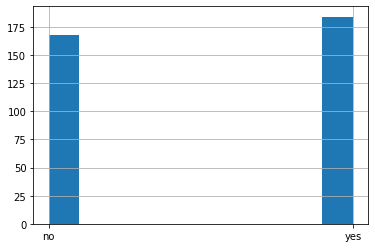

In [552]:
stud_math.activities.hist()
stud_math.loc[:, ['activities']].info()

yes    277
no      73
Name: nursery, dtype: int64

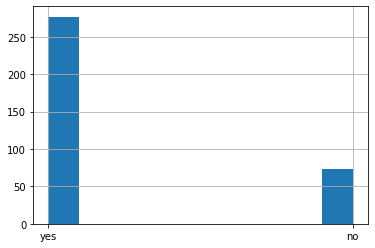

In [556]:
stud_math.nursery.hist()
stud_math.nursery.value_counts()

Большинство ходило в детский сад.

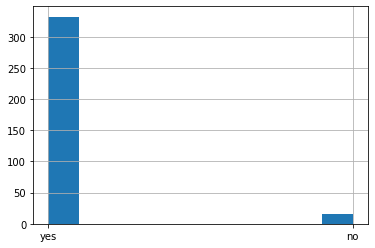

In [557]:
stud_math.higher.hist()

Абсолютное большинство хочет получить высшее образование.

count     334
unique      2
top       yes
freq      279
Name: internet, dtype: object

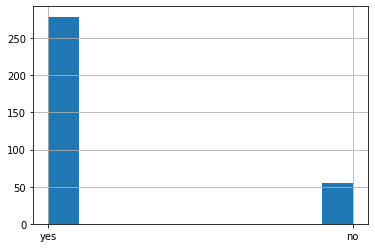

In [559]:
stud_math.internet.hist()
stud_math.internet.describe()

no     225
yes    111
Name: romantic, dtype: int64

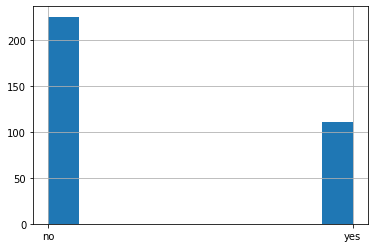

In [563]:
stud_math.romantic.hist()
stud_math.romantic.value_counts()

Примерно у третит есть романтические отношения.

Количество пропущенных занятий vs Score --> 0.081274

Наличие романтических отношений vs количество промущенных занятий

### Анализ номинативных переменных

In [564]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

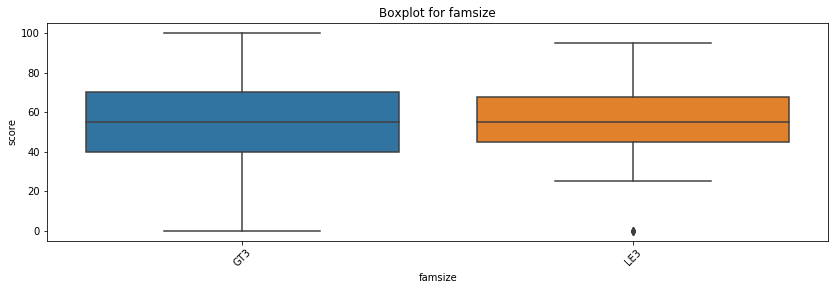

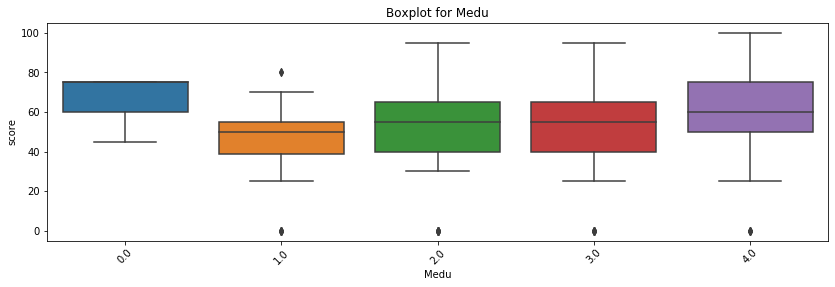

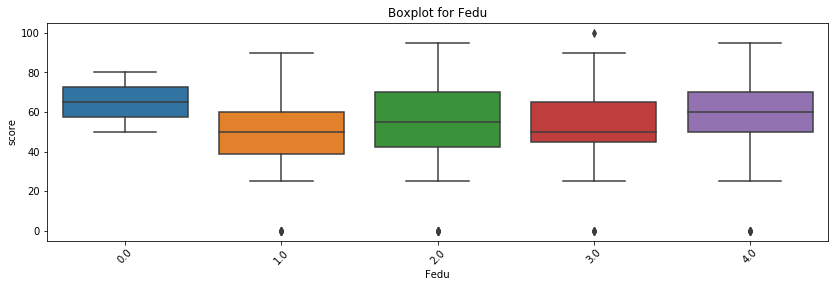

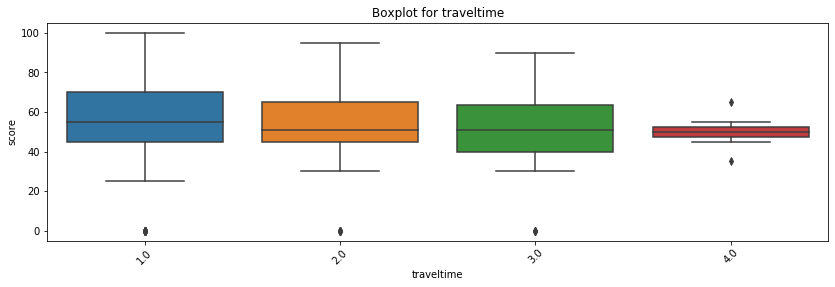

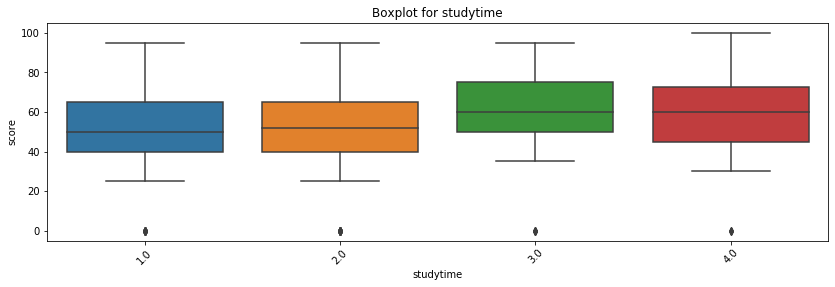

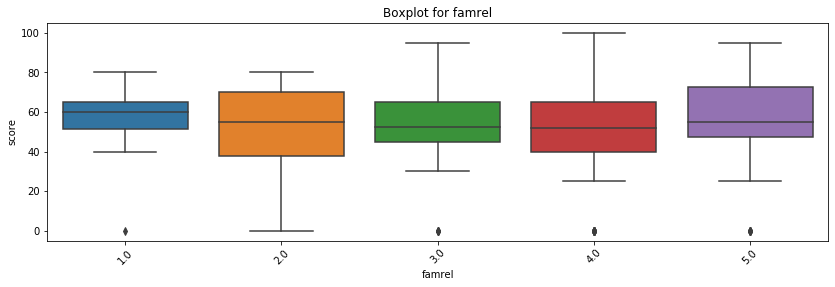

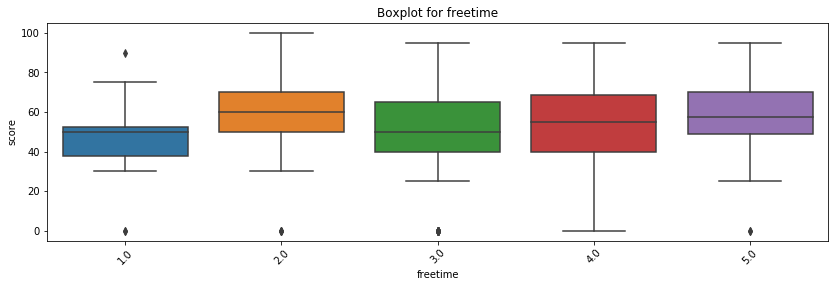

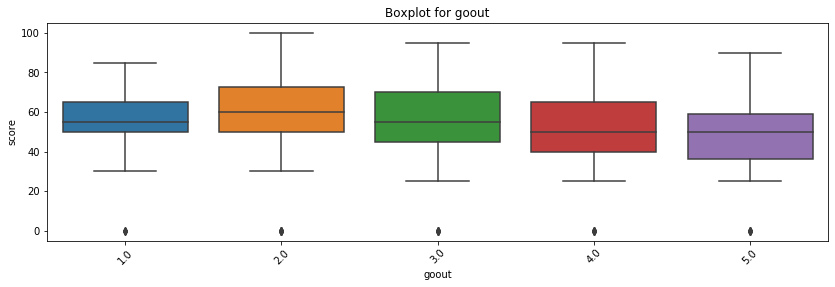

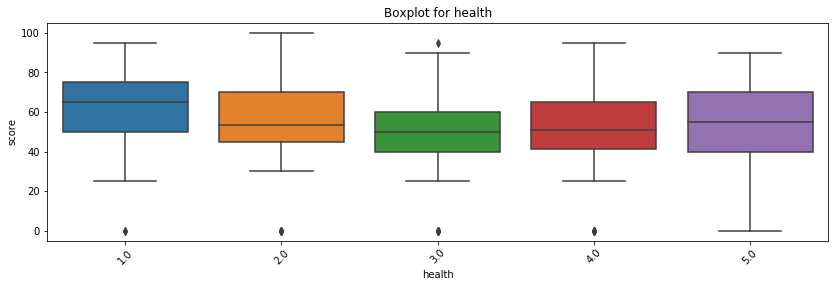

In [567]:
#номинативные переменные
for col in ['famsize', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel',\
           'freetime', 'goout', 'health']:
    get_boxplot(col)



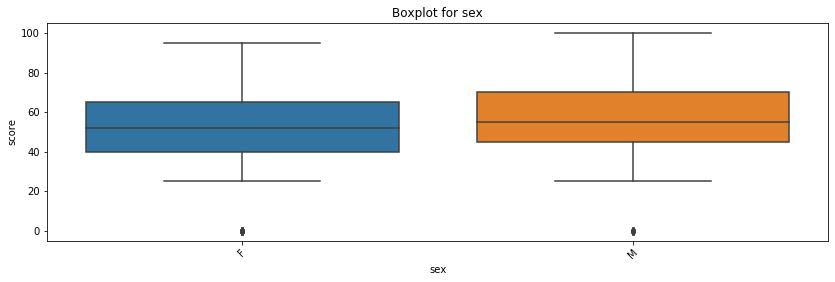

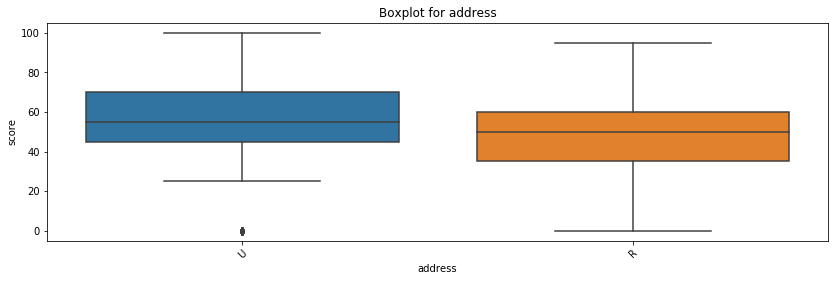

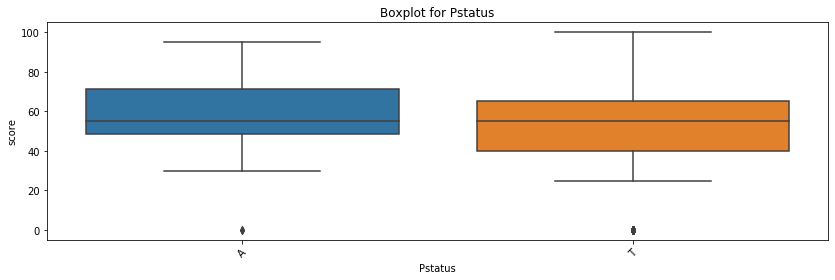

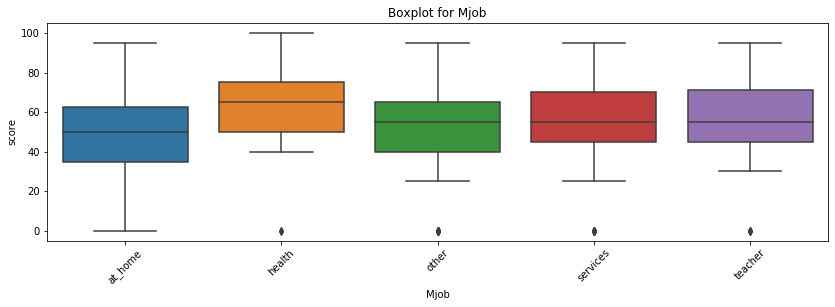

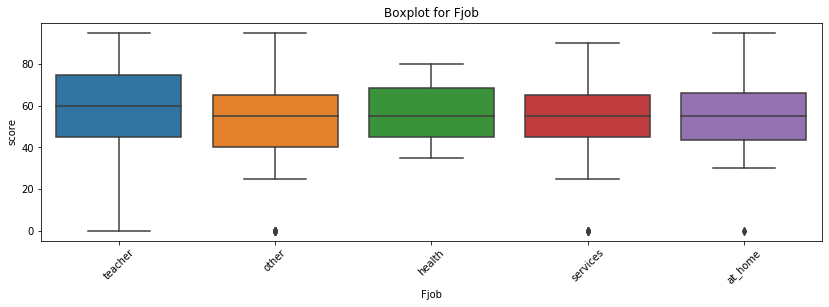

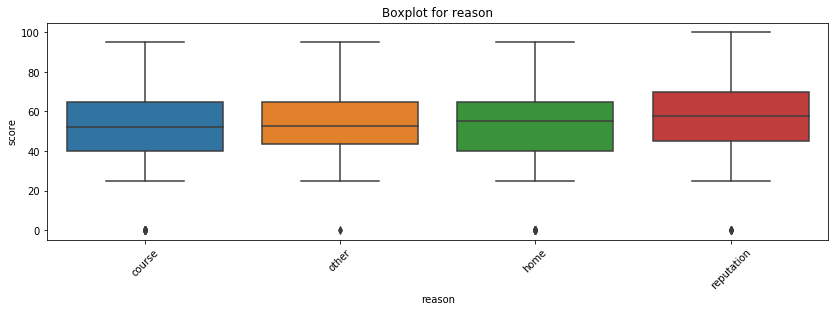

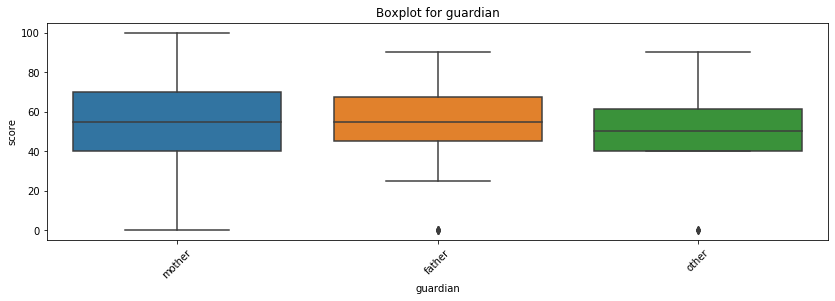

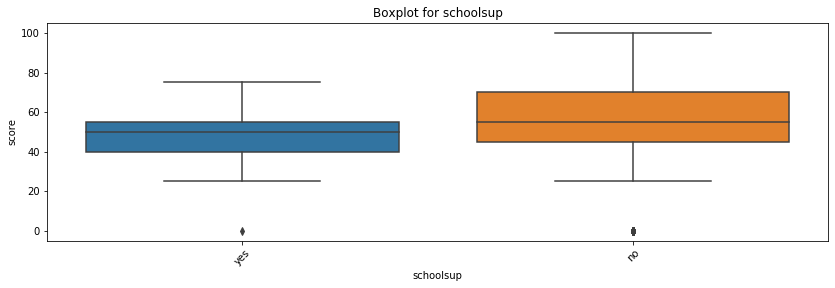

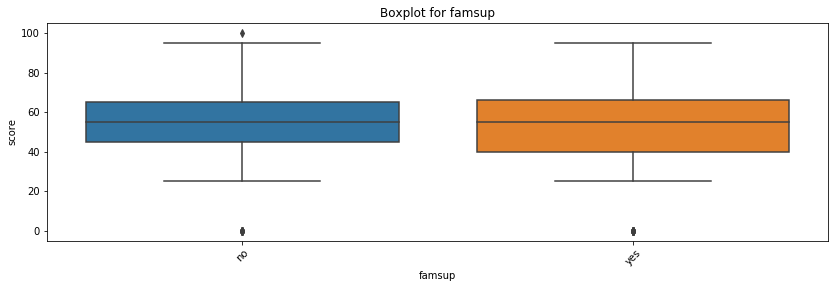

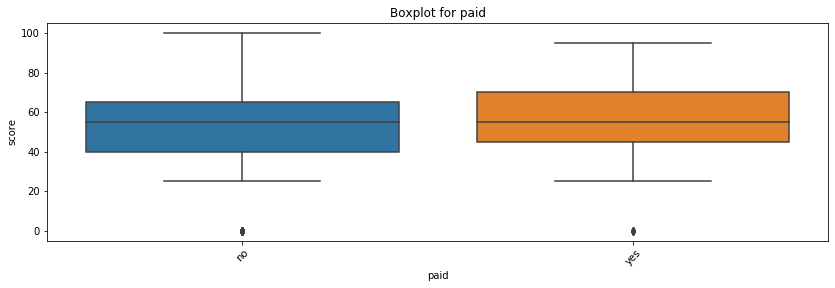

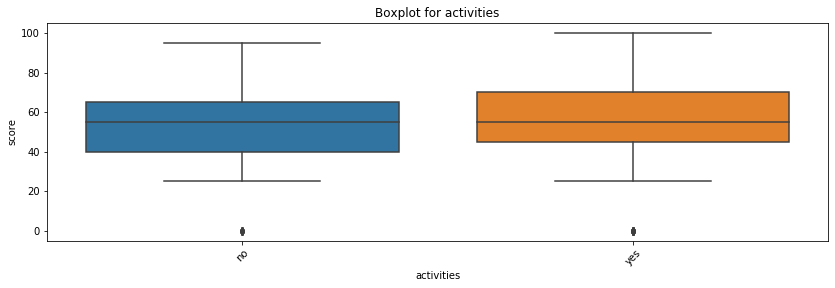

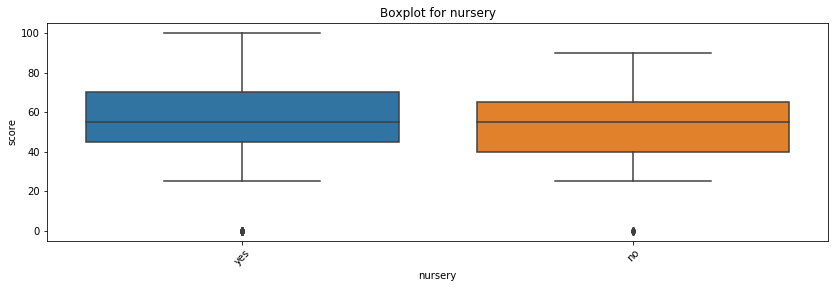

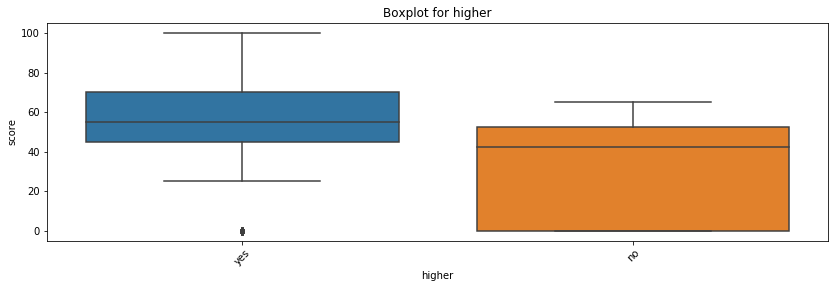

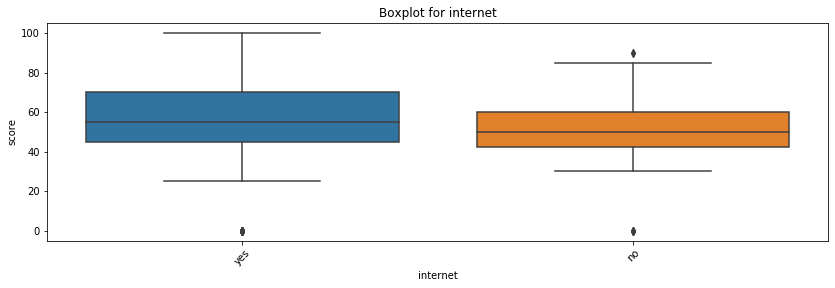

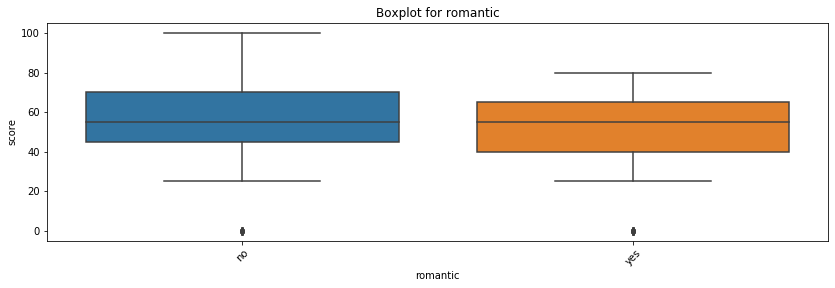

In [574]:
#категориальные переменные
for col in ['sex', 'address', 'Pstatus', 'Mjob', 'Fjob', 'reason',\
           'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',\
           'romantic']:
    get_boxplot(col)

Среди учеников, у которых большие проблемы со здоровьем - успеваемость лучше.
Лучше учаться дети, у которых в семье все ок.
Те кто тратят время на учебу вне школы, имеют выше score.
Разер семьи вообще не имеет значения.

In [568]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [569]:
for col in ['famsize', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel',\
           'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Medu


In [572]:
for col in ['sex', 'address', 'Pstatus', 'Mjob', 'Fjob', 'reason',\
           'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',\
           'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Корреляция показала, что можно убрать только studytime, granular и studytime (что-то одно из них).
Выброс был в признаке "образование отца". Выброс был заменен на значение, подходящее по смыслу (вместо 40 -> 4).
В данных мало пропусков. 
Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это\
Medu, sex, address, Mjob,paid, hieher, romanic и что-то из корреляции(но не понимаю, что).